# **Business Case : Jamboree Education**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv' -O admission.csv

--2023-11-27 05:12:18--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.217, 18.239.15.127, 18.239.15.11, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘admission.csv’

admission.csv       100%[===================>]  15.80K  --.-KB/s    in 0s      

2023-11-27 05:12:18 (39.8 MB/s) - ‘admission.csv’ saved [16176/16176]



**Problem Statement**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

An Analysis that will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category'**

In [ ]:
#Observations on shape of data
admission = pd.read_csv('admission.csv')
print('rows: ',admission.shape[0])
print('columns: ',admission.shape[1])

rows:  500
columns:  9


In [ ]:
#data types of all the attributes
admission.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
#missing value detection
admission.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values

In [ ]:
#statistical summary
admission.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
#number of unique values in our data
for i in admission.columns:
  print(i,':',admission[i].nunique())

Serial No. : 500
GRE Score : 49
TOEFL Score : 29
University Rating : 5
SOP : 9
LOR  : 9
CGPA : 184
Research : 2
Chance of Admit  : 61


In [ ]:
#value counts of these attribute
for i in admission.columns:
  print(i,':',dict(admission[i].value_counts()))

Serial No. : {1: 1, 330: 1, 343: 1, 342: 1, 341: 1, 340: 1, 339: 1, 338: 1, 337: 1, 336: 1, 335: 1, 334: 1, 333: 1, 332: 1, 331: 1, 329: 1, 314: 1, 328: 1, 327: 1, 326: 1, 325: 1, 324: 1, 323: 1, 322: 1, 321: 1, 320: 1, 319: 1, 318: 1, 317: 1, 316: 1, 344: 1, 345: 1, 346: 1, 347: 1, 374: 1, 373: 1, 372: 1, 371: 1, 370: 1, 369: 1, 368: 1, 367: 1, 366: 1, 365: 1, 364: 1, 363: 1, 362: 1, 361: 1, 360: 1, 359: 1, 358: 1, 357: 1, 356: 1, 355: 1, 354: 1, 353: 1, 352: 1, 351: 1, 350: 1, 349: 1, 348: 1, 315: 1, 313: 1, 2: 1, 267: 1, 280: 1, 279: 1, 278: 1, 277: 1, 276: 1, 275: 1, 274: 1, 273: 1, 272: 1, 271: 1, 270: 1, 269: 1, 268: 1, 266: 1, 312: 1, 265: 1, 264: 1, 263: 1, 262: 1, 261: 1, 260: 1, 259: 1, 258: 1, 257: 1, 256: 1, 255: 1, 254: 1, 253: 1, 281: 1, 282: 1, 283: 1, 284: 1, 311: 1, 310: 1, 309: 1, 308: 1, 307: 1, 306: 1, 305: 1, 304: 1, 303: 1, 302: 1, 301: 1, 300: 1, 299: 1, 298: 1, 297: 1, 296: 1, 295: 1, 294: 1, 293: 1, 292: 1, 291: 1, 290: 1, 289: 1, 288: 1, 287: 1, 286: 1, 285: 1

##Visual Analysis

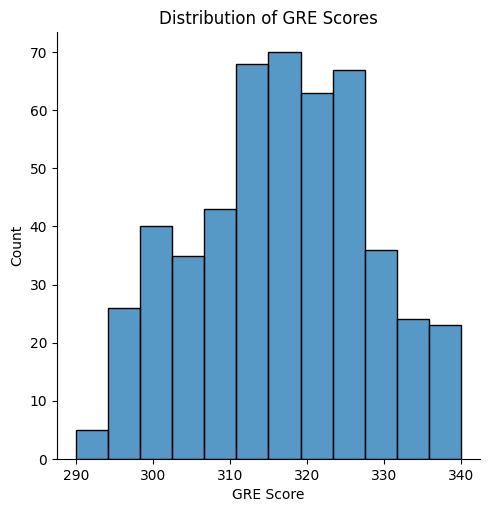

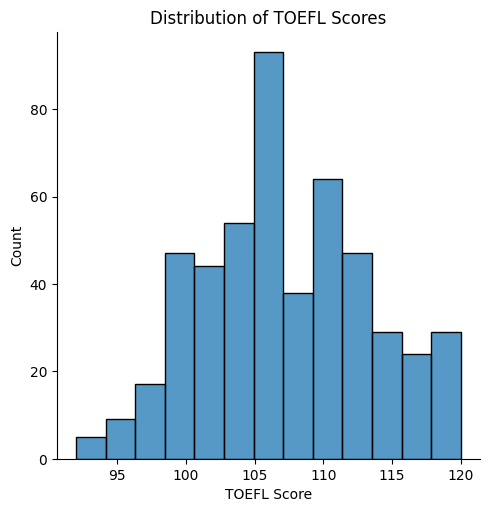

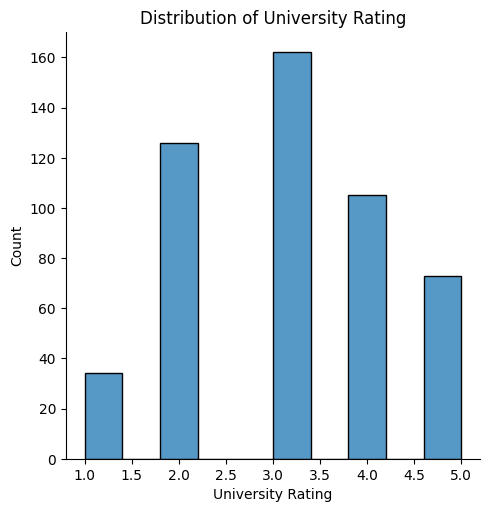

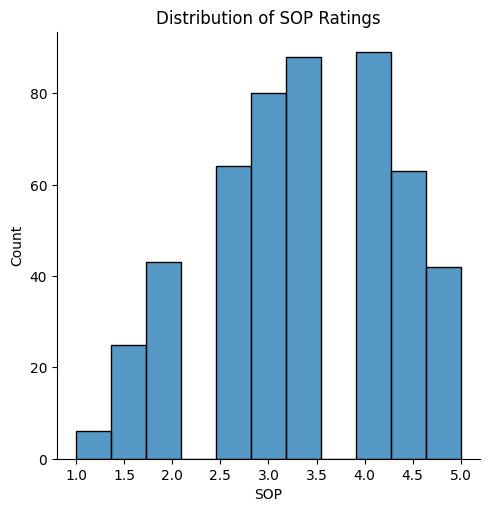

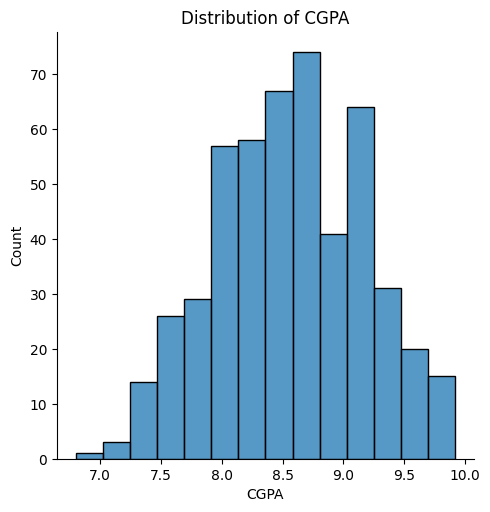

In [ ]:

sns.displot(admission['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

sns.displot(admission['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

sns.displot(admission['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

sns.displot(admission['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

sns.displot(admission['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()
plt.show()

<Axes: >

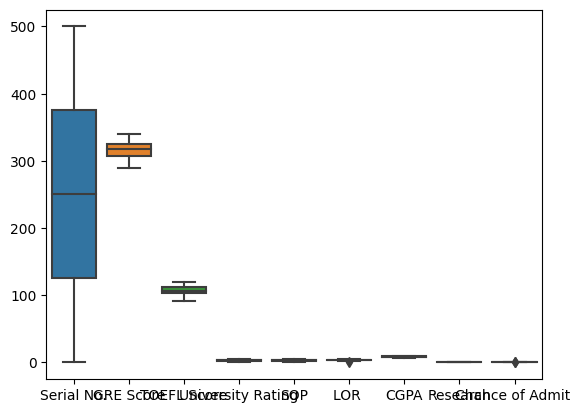

In [ ]:
#Check the outliers ad value range
sns.boxplot(data=admission)

<Axes: >

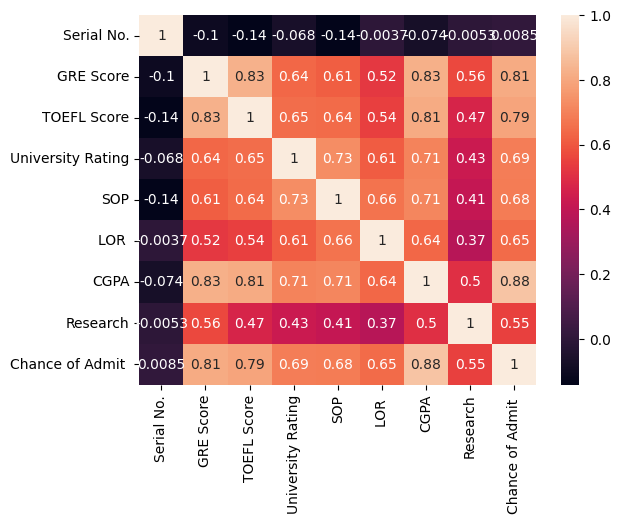

In [ ]:
#correlation
sns.heatmap(admission.corr(),annot=True)

## Insights based on EDA



*   It is clear from the distributions, students with varied merit apply for the university.
*   Average CGPA lies around **8.0** to **9.0**.
*   Average GRE score lies around **310** to **330**.
*   Average CGPA lies around **100** to **110**.
*   Based on the correlation, **GRE Score**, **TOEFL Score** and **CGPA** is highly corelated to chance of admit.
*   The values don't have any outliers.

#Data Preprocessing

In [ ]:
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Duplicate check - There is no duplicates in the dataset
d=admission.drop('Serial No.',axis=1)
d[d.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [ ]:
#There are no missing values
admission.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<Axes: >

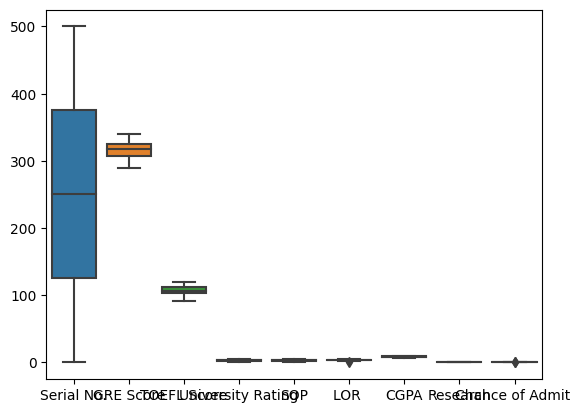

In [ ]:
#Outlier treatment
sns.boxplot(data=admission)

There are no outliers in either of the features.



In [ ]:
#Feature engineering
np.corrcoef(admission['Serial No.'],admission['Chance of Admit '])

array([[1.        , 0.00850505],
       [0.00850505, 1.        ]])

In [ ]:
admission.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


With correlation, we found out that serial number is less correlated to chance of admit.
Rest of the features are correlated with the target variable.
So we are dropping Serial Number from the dataset.

In [ ]:
data = admission.drop('Serial No.',axis=1)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#Data preparation - Normalization
from sklearn.preprocessing import MinMaxScaler
target = data['Chance of Admit ']
dataset = data.drop('Chance of Admit ',axis = 1)
norm = MinMaxScaler()
transformed_data = pd.DataFrame(norm.fit_transform(dataset),columns = dataset.columns)
transformed_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [ ]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_data, target, test_size=0.20, random_state=1)

#**Model Building**

In [ ]:
#Linear, Ridge and Lasso Regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(alpha = 0.1),
    "Ridge" : Ridge(alpha = 1.0)
}
for name,model in models.items():
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  print(name,":",np.sqrt(mean_squared_error(y_test,pred)))

Linear Regression : 0.058814104576507695
Lasso : 0.13902375921043136
Ridge : 0.05941233247410392


In [ ]:
#Stats Model
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.7
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          2.10e-142
Time:                        08:32:04   Log-Likelihood:                 559.27
No. Observations:                 400   AIC:                            -1103.
Df Residuals:                     392   BIC:                            -1071.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3518      0.01

P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant

In [ ]:
X_sm_new=X_sm.drop(columns='SOP')
model_new = sm.OLS(y_train.values, X_sm_new).fit()
y_hat = model_new.predict(X_sm_new)
errors = y_hat - y_train.values
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.1
Date:                Mon, 27 Nov 2023   Prob (F-statistic):          1.38e-143
Time:                        08:32:36   Log-Likelihood:                 559.10
No. Observations:                 400   AIC:                            -1104.
Df Residuals:                     393   BIC:                            -1076.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3522      0.01

In [ ]:
print('Mean Absolute Error ', mean_absolute_error(y_train.values,y_hat) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_train.values,y_hat) ))
print('r2_score ', r2_score(y_train.values,y_hat) )

Mean Absolute Error  0.04300438146326064
Root Mean Square Error  0.05980416214572902
r2_score  0.8213508151961642


# **Testing the assumptions of the linear regression model**

## Multicollinearity check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_t = pd.DataFrame(X_sm_new, columns=X_sm_new.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.36
1,GRE Score,4.85
5,CGPA,4.57
2,TOEFL Score,4.20
3,University Rating,2.37
4,LOR,1.90
6,Research,1.51


VIF looks fine, we can work on predictions


In [ ]:
X_test_new = X_test.drop('SOP',axis = 1)
X_test_sm = sm.add_constant(X_test_new)

model_final = sm.OLS(y_test, X_test_sm)
result = model_final.fit()
pred = result.predict(X_test_sm)
# Print the summary statistics of the model
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     76.46
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           8.86e-34
Time:                        07:11:31   Log-Likelihood:                 144.49
No. Observations:                 100   AIC:                            -275.0
Df Residuals:                      93   BIC:                            -256.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3367      0.02

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('Mean Absolute Error ', mean_absolute_error(y_test.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_test.values,pred) ))
print('r2_score ', r2_score(y_test.values,pred) )

Mean Absolute Error  0.04051132374081083
Root Mean Square Error  0.057050888231538574
r2_score  0.8314533764171971


## Mean of residuals

In [ ]:
mean = round(np.mean(pred-y_test.values),5)
print(f"Mean of residuals : {mean}")

Mean of residuals : 0.0


## Normality of residuals

Text(0.5, 1.0, 'Histogram of residuals')

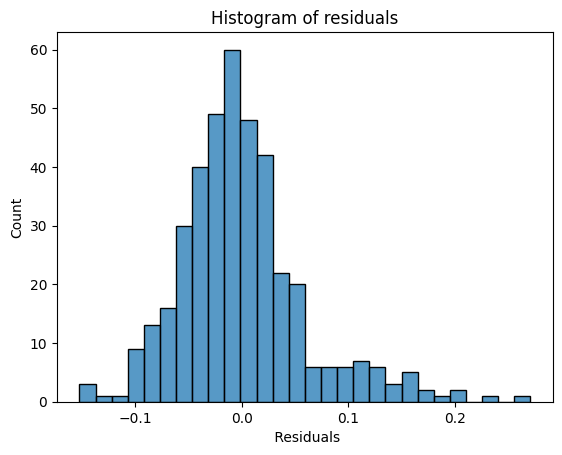

In [ ]:
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic

0.9376941323280334

Closer the value to 1, more is the normality.

## Test for Homoscedasticity

Text(0.5, 1.0, 'Predicted values vs Residuals')

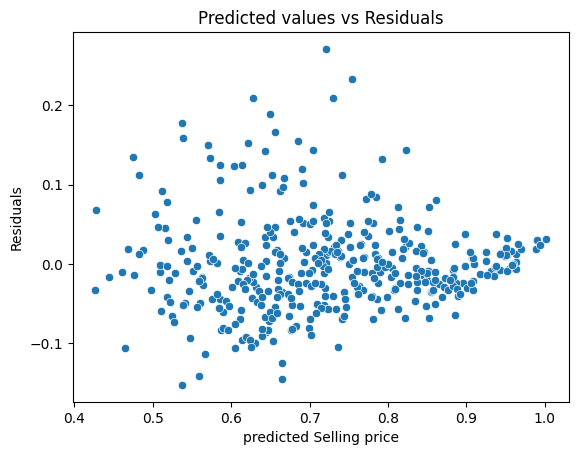

In [ ]:
sns.scatterplot(x=y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm_new)
lzip(name, test)

[('F statistic', 0.936135417863976), ('p-value', 0.676445454450526)]

From the goldfeld-quandt test:
- F Statistic comes out to be .93 => Implying minimal difference in variance between groups
- p-value of 0.67 indicates that this difference is  not statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

# **Model performance evaluation**

**Train Performance:**
*   Mean Absolute Error : 0.043
*   Root Mean Square Error : 0.059
*   r2_score : 0.821
*   Ad r2_score : 0.819

**Test Performance:**
*   Mean Absolute Error : 0.040
*   Root Mean Square Error : 0.057
*   r2_score : 0.831
*   Ad r2_score : 0.821

Since r2_score is near to 1 in train and test data, we can conclude that model performance is good.

Text(0, 0.5, 'y_pred')

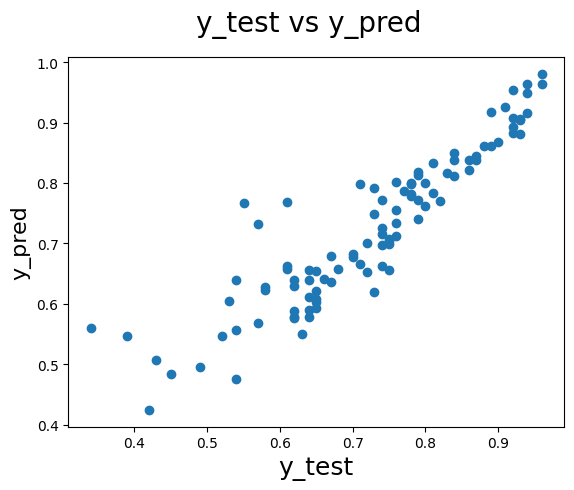

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# **Actionable Insights & Recommendations**

**Insights:**
Model is performing better if the chances of admit is higher than chances of admit is lower.

**Scope of Improvement:**
Adding more training data when chances of admit is lower.